In [130]:
from sklearn import svm
from imblearn.over_sampling import SMOTE



In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score

In [144]:
data_train = pd.read_csv("./train.csv")
data_train

,filename,dispersion_entropy,RDE,kelas
0,FNSZ325.mat,2.177414,0.004687,FNSZ
1,FNSZ443.mat,2.173413,0.005799,FNSZ
2,FNSZ457.mat,2.128589,0.014401,FNSZ
3,GNSZ018.mat,0.778805,0.549478,GNSZ
4,FNSZ331.mat,1.926150,0.065480,FNSZ
...,...,...,...,...
861,FNSZ300.mat,2.151531,0.008903,FNSZ
862,GNSZ029.mat,2.060288,0.019217,GNSZ
863,GNSZ001.mat,1.545435,0.161897,GNSZ
864,FNSZ328.mat,2.140018,0.013467,FNSZ


In [145]:
data_test = pd.read_csv('./test.csv')
data_test

,filename,dispersion_entropy,RDE,kelas
0,MYSZ003.mat,0.079170,0.784690,MYSZ
1,FNSZ641.mat,1.386467,0.183812,FNSZ
2,FNSZ899.mat,1.617569,0.122826,FNSZ
3,FNSZ655.mat,2.030250,0.031383,FNSZ
4,GNSZ232.mat,1.392251,0.189670,GNSZ
...,...,...,...,...
680,GNSZ203.mat,1.474234,0.157782,GNSZ
681,GNSZ217.mat,1.356132,0.219959,GNSZ
682,FNSZ880.mat,1.862965,0.059810,FNSZ
683,FNSZ658.mat,1.302725,0.218821,FNSZ


In [146]:
data_train = data_train.drop(columns=["filename"])
data_test = data_test.drop(columns=["filename"])

# Undersampling Technique

In [108]:
data_train=data_train[data_train.kelas != "ABSZ"]
data_train=data_train[data_train.kelas != "TCSZ"]
data_train=data_train[data_train.kelas != "TNSZ"]
data_train=data_train[data_train.kelas != "SPSZ"]
data_train=data_train[data_train.kelas != "MYSZ"]
value_counts = data_train['kelas'].value_counts()
total_count = data_train.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = data_train[data_train.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major_train = data_train[data_train.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major_train, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
data_train = data_train.loc[undersampleIndices]

data_train


Total of FNSZ : 132
Total of GNSZ : 132


,filename,dispersion_entropy,RDE,kelas
12,CPSZ104.mat,2.080581,0.017452,CPSZ
13,CPSZ110.mat,2.086388,0.015487,CPSZ
18,CPSZ058.mat,1.914971,0.054943,CPSZ
19,CPSZ070.mat,1.900081,0.063032,CPSZ
20,CPSZ064.mat,1.904491,0.061772,CPSZ
...,...,...,...,...
421,GNSZ136.mat,2.054569,0.020294,GNSZ
626,GNSZ102.mat,1.391545,0.187481,GNSZ
299,GNSZ093.mat,2.071454,0.016961,GNSZ
50,GNSZ031.mat,1.474234,0.157782,GNSZ


In [106]:
value_counts.idxmin()

'CPSZ'

In [109]:
data_test=data_test[data_test.kelas != "ABSZ"]
data_test=data_test[data_test.kelas != "TCSZ"]
data_test=data_test[data_test.kelas != "TNSZ"]
data_test=data_test[data_test.kelas != "SPSZ"]
data_test=data_test[data_test.kelas != "MYSZ"]

for a in range(250):
    if(data_test['kelas'].iloc[a] == "FNSZ"):
        data_test = data_test.drop(data_test.iloc[a].name)


data_test['kelas'].value_counts()

FNSZ    261
GNSZ    138
CPSZ     98
Name: kelas, dtype: int64

In [110]:
data_train['kelas'].value_counts()

CPSZ    132
FNSZ    132
GNSZ    132
Name: kelas, dtype: int64

In [58]:
# data_train=data_train[data_train.kelas != "ABSZ"]
# data_train=data_train[data_train.kelas != "TCSZ"]
# data_train=data_train[data_train.kelas != "TNSZ"]
# data_train=data_train[data_train.kelas != "SPSZ"]
# data_train=data_train[data_train.kelas != "MYSZ"]
# data_train['kelas'].value_counts()

# for a in range(310):
#     if(data_train['kelas'].iloc[a] == "FNSZ"):
#         data_train = data_train.drop(data_train.iloc[a].name)


# data_train['kelas'].value_counts()

FNSZ    332
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [59]:
# for a in range(130,200):
#     if(data_train['kelas'].iloc[a] == "FNSZ"):
#         data_train = data_train.drop(data_train.iloc[a].name)


# data_train['kelas'].value_counts()

FNSZ    305
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

,dispersion_entropy,RDE,kelas
12,2.080581,0.017452,CPSZ
13,2.086388,0.015487,CPSZ
18,1.914971,0.054943,CPSZ
19,1.900081,0.063032,CPSZ
20,1.904491,0.061772,CPSZ
...,...,...,...
421,2.054569,0.020294,GNSZ
626,1.391545,0.187481,GNSZ
299,2.071454,0.016961,GNSZ
50,1.474234,0.157782,GNSZ


In [112]:
classes_train = np.array(data_train['kelas'])
data_train = data_train.drop(columns=["kelas"])

In [113]:
data_train

,dispersion_entropy,RDE
12,2.080581,0.017452
13,2.086388,0.015487
18,1.914971,0.054943
19,1.900081,0.063032
20,1.904491,0.061772
...,...,...
421,2.054569,0.020294
626,1.391545,0.187481
299,2.071454,0.016961
50,1.474234,0.157782


In [128]:
classifier = svm.SVC(kernel='linear')
kfold = KFold(n_splits=5, shuffle=True)
# classifier.fit(data_train,classes_train)
scores = cross_val_score(classifier, data_train, classes_train, cv=kfold)

In [129]:
scores

array([0.275     , 0.32911392, 0.30379747, 0.32911392, 0.30379747])

In [115]:

classes_test = np.array(data_test['kelas'])
data_test = data_test.drop(columns=["kelas"])

In [116]:
prediksi = classifier.predict(data_test)

In [117]:
data_train.iloc[[3]]

,dispersion_entropy,RDE
19,1.900081,0.063032


In [118]:

classifier.predict(data_train.iloc[[3]])

array(['FNSZ'], dtype=object)

In [119]:
classes_train[3]

'CPSZ'

In [120]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes_test,prediksi)
print("Akurasi: ",str(acc))

Akurasi:  0.43259557344064387


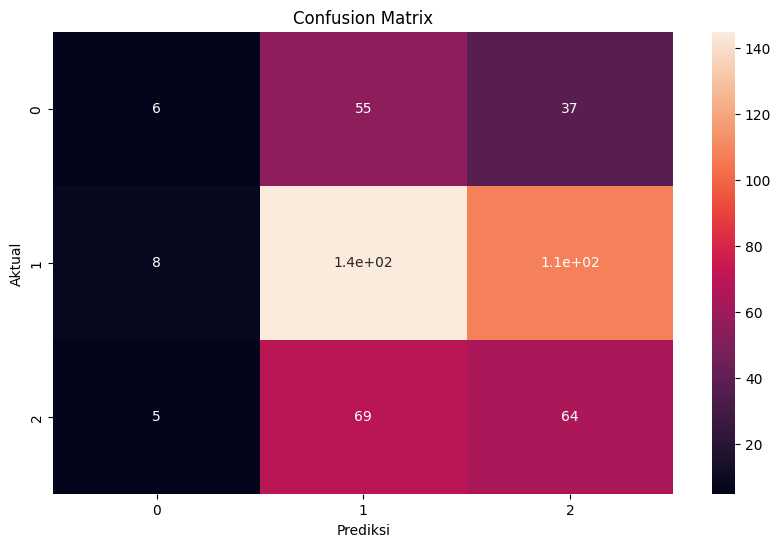

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(classes_test, prediksi)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

# Oversampling Technique

In [147]:
data_train=data_train[data_train.kelas != "ABSZ"]
data_train=data_train[data_train.kelas != "TCSZ"]
data_train=data_train[data_train.kelas != "TNSZ"]
data_train=data_train[data_train.kelas != "SPSZ"]
data_train=data_train[data_train.kelas != "MYSZ"]
classes_train = np.array(data_train['kelas'])
data_train = data_train.drop(columns=["kelas"])

In [148]:
smote = SMOTE(sampling_strategy='all')
X_resampled, y_resampled = smote.fit_resample(data_train, classes_train)


In [164]:
import optuna
from optuna.study import Study


def create_hyperparameter_space():
  space = {
      'C': optuna.uniform('C', 0.1, 10.0),
      'gamma': optuna.uniform('gamma', 0.001, 0.1),
      'kernel': optuna.categorical('kernel', ['rbf', 'poly', 'sigmoid']),
  }
  return space


def objective(trial):

  model = svm.SVC(
      C=trial.suggest_uniform('C', 0.1, 10.0),
      gamma=trial.suggest_uniform('gamma', 0.001, 0.1),
      kernel=trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
  )


  kfold = KFold(n_splits=5, shuffle=True)
  scores = cross_val_score(model, data_train, classes_train, cv=kfold)


  return np.mean(scores)


study = optuna.create_study()

[I 2023-01-02 18:15:40,070] A new study created in memory with name: no-name-a0069eac-5ae4-4766-b48b-ef70162e41aa


In [165]:
study.optimize(objective, n_trials=100)


print(study.best_params)

C:\Users\Alvin Buana\AppData\Local\Temp\ipykernel_27052\2211026158.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C=trial.suggest_uniform('C', 0.1, 10.0),
C:\Users\Alvin Buana\AppData\Local\Temp\ipykernel_27052\2211026158.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma=trial.suggest_uniform('gamma', 0.001, 0.1),
[I 2023-01-02 18:15:40,479] Trial 0 finished with value: 0.6315151515151516 and parameters: {'C': 0.6713200077680112, 'gamma': 0.09123687883166307, 'kernel': 'rbf'}. Best is trial 0 with value: 0.6315151515151516.
C:\Users\Alvin Buana\AppData\Local\Temp\ipykernel_27052\2211026158.py:17: FutureWarning: suggest_uniform has been

{'C': 6.286294825093148, 'gamma': 0.09993696833583808, 'kernel': 'sigmoid'}


In [166]:
classifier = svm.SVC(**study.best_params)
kfold = KFold(n_splits=5, shuffle=True)
# classifier.fit(data_train,classes_train)
scores = cross_val_score(classifier, data_train, classes_train, cv=kfold)
scores

array([0.63636364, 0.61818182, 0.61212121, 0.64848485, 0.6       ])